In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mkechinov/ecommerce-purchase-history-from-electronics-store")

print("Path to dataset files:", path)

100%|██████████| 50.5M/50.5M [00:00<00:00, 190MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/mkechinov/ecommerce-purchase-history-from-electronics-store/versions/2


In [1]:
from google.colab import drive
drive.mount('/content/drive')

# Đường dẫn đến file CSV trong Google Drive
csv_path = "/content/drive/MyDrive/datasets/kz.csv"

import pandas as pd
df = pd.read_csv(csv_path)
# Hiển thị 5 dòng dữ liệu đầu tiên
print("5 dòng dữ liệu đầu tiên:")
display(df.head())

# Hiển thị 5 dòng dữ liệu cuối cùng
print("\n5 dòng dữ liệu cuối cùng:")
display(df.tail())

Mounted at /content/drive
5 dòng dữ liệu đầu tiên:


,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
0,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
1,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
2,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
3,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
4,2020-04-24 19:16:21 UTC,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18



5 dòng dữ liệu cuối cùng:


,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
2633516,2020-11-21 10:10:01 UTC,2388440981134693942,1515966223526602848,2.268105e+18,electronics.smartphone,oppo,138.87,1.515916e+18
2633517,2020-11-21 10:10:13 UTC,2388440981134693943,1515966223509089282,2.268105e+18,electronics.smartphone,apple,418.96,1.515916e+18
2633518,2020-11-21 10:10:30 UTC,2388440981134693944,1515966223509089917,2.268105e+18,appliances.personal.scales,vitek,12.48,1.515916e+18
2633519,2020-11-21 10:10:30 UTC,2388440981134693944,2273948184839454837,2.268105e+18,NaN,moulinex,41.64,1.515916e+18
2633520,2020-11-21 10:10:30 UTC,2388440981134693944,1515966223509127566,2.268105e+18,appliances.kitchen.blender,redmond,53.22,1.515916e+18


In [ ]:
import pandas as pd

# --- ĐOẠN CODE SỬA LỖI VÀ KIỂM TRA LẠI THỜI GIAN ---

# 1. Đảm bảo cột event_time có đúng định dạng datetime
# errors='coerce' sẽ biến các giá trị lỗi thành NaT (Not a Time), một dạng null
df['event_time'] = pd.to_datetime(df['event_time'], errors='coerce')

# 2. Loại bỏ các dòng có thời gian không hợp lệ (nếu có)
df.dropna(subset=['event_time'], inplace=True)

# 3. Thực hiện lại các phép tính thời gian
start_date = df['event_time'].min()
end_date = df['event_time'].max()
time_span = end_date - start_date

print(f"Dữ liệu được ghi nhận từ ngày: {start_date}")
print(f"Đến ngày: {end_date}")
print(f"Tổng khoảng thời gian của dữ liệu là: {time_span.days} ngày")

Dữ liệu được ghi nhận từ ngày: 1970-01-01 00:33:40+00:00
Đến ngày: 2020-11-21 10:10:30+00:00
Tổng khoảng thời gian của dữ liệu là: 18587 ngày


In [ ]:
# In ra kích thước dữ liệu trước khi lọc
print(f"Kích thước dữ liệu TRƯỚC khi lọc bỏ năm 1970: {df.shape}")

# Lọc và giữ lại những dòng có năm trong cột 'event_time' khác 1970
# .copy() được thêm vào để tạo ra một DataFrame mới, độc lập và tránh cảnh báo
df_filtered = df[df['event_time'].dt.year != 1970].copy()

# In ra kích thước dữ liệu sau khi lọc
print(f"Kích thước dữ liệu SAU khi lọc bỏ năm 1970: {df_filtered.shape}")

# Kiểm tra lại ngày bắt đầu mới
new_start_date = df_filtered['event_time'].min()
print(f"\nNgày bắt đầu mới của dữ liệu là: {new_start_date}")

Kích thước dữ liệu TRƯỚC khi lọc bỏ năm 1970: (2633521, 8)
Kích thước dữ liệu SAU khi lọc bỏ năm 1970: (2613890, 8)

Ngày bắt đầu mới của dữ liệu là: 2020-01-05 03:26:46+00:00


In [ ]:
# In ra thông tin tổng quan của DataFrame
print("Thông tin tổng quan về dữ liệu:")
df.info()

Thông tin tổng quan về dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2633521 entries, 0 to 2633520
Data columns (total 8 columns):
 #   Column         Dtype              
---  ------         -----              
 0   event_time     datetime64[ns, UTC]
 1   order_id       int64              
 2   product_id     int64              
 3   category_id    float64            
 4   category_code  object             
 5   brand          object             
 6   price          float64            
 7   user_id        float64            
dtypes: datetime64[ns, UTC](1), float64(3), int64(2), object(2)
memory usage: 160.7+ MB


In [ ]:
# Hiển thị thống kê mô tả cho các cột số
print("Thống kê mô tả cho các cột số:")
display(df.describe())

Thống kê mô tả cho các cột số:


,order_id,product_id,category_id,price,user_id
count,2.633521e+06,2.633521e+06,2.201567e+06,2.201567e+06,5.641690e+05
mean,2.361783e+18,1.674080e+18,2.273827e+18,1.540932e+02,1.515916e+18
std,1.716538e+16,3.102249e+17,2.353247e+16,2.419421e+02,2.379057e+07
min,2.294360e+18,1.515966e+18,2.268105e+18,0.000000e+00,1.515916e+18
25%,2.348807e+18,1.515966e+18,2.268105e+18,1.456000e+01,1.515916e+18
50%,2.353254e+18,1.515966e+18,2.268105e+18,5.553000e+01,1.515916e+18
75%,2.383131e+18,1.515966e+18,2.268105e+18,1.967400e+02,1.515916e+18
max,2.388441e+18,2.388434e+18,2.374499e+18,5.092590e+04,1.515916e+18


In [ ]:
# Đếm số lượng giá trị thiếu trong mỗi cột
print("Số lượng giá trị thiếu (null/NaN) trong mỗi cột:")
print(df.isnull().sum())

Số lượng giá trị thiếu (null/NaN) trong mỗi cột:
event_time             0
order_id               0
product_id             0
category_id       431954
category_code     612202
brand             506005
price             431954
user_id          2069352
dtype: int64


In [ ]:
# In ra kích thước dữ liệu ban đầu
print(f"Kích thước dữ liệu ban đầu: {df.shape}")

# Loại bỏ các dòng có giá trị NaN trong cột 'user_id' hoặc 'price'
df.dropna(subset=['user_id', 'price'], inplace=True)

# In ra kích thước dữ liệu sau khi loại bỏ
print(f"Kích thước dữ liệu sau khi loại bỏ các dòng thiếu thông tin cốt lõi: {df.shape}")

Kích thước dữ liệu ban đầu: (2633521, 8)
Kích thước dữ liệu sau khi loại bỏ các dòng thiếu thông tin cốt lõi: (564169, 8)


In [ ]:
# Lấp đầy các dòng thiếu thông tin phụ

# Gán trực tiếp kết quả fillna() trở lại cột, thay vì dùng inplace=True
df['brand'] = df['brand'].fillna('unknown')
df['category_code'] = df['category_code'].fillna('unknown')

# Kiểm tra lại để chắc chắn không còn giá trị thiếu
print("\nKiểm tra lại giá trị thiếu:")
print(df.isnull().sum())


Kiểm tra lại giá trị thiếu:
event_time       0
order_id         0
product_id       0
category_id      0
category_code    0
brand            0
price            0
user_id          0
dtype: int64


In [ ]:
# Chuyển đổi cột event_time sang kiểu datetime
# errors='coerce' sẽ biến các giá trị không hợp lệ thành NaT (Not a Time)
df['event_time'] = pd.to_datetime(df['event_time'], errors='coerce')

# Ta tiếp tục loại bỏ các dòng có thể đã bị lỗi khi chuyển đổi thời gian (nếu có)
df.dropna(subset=['event_time'], inplace=True)
df = df[df['event_time'].dt.year != 1970].copy() # Lọc bỏ năm 1970

# Chuyển đổi các cột ID sang kiểu chuỗi (object/string)
id_columns = ['order_id', 'product_id', 'category_id', 'user_id']
df[id_columns] = df[id_columns].astype(str)

print("\nĐã chuyển đổi xong kiểu dữ liệu. ✅")


Đã chuyển đổi xong kiểu dữ liệu. ✅


In [ ]:
# 1. Tách cột 'category_code' thành 'main_category' và 'sub_category'
split_categories = df['category_code'].str.split('.', n=1, expand=True)
df['main_category'] = split_categories[0]
df['sub_category'] = split_categories[1].fillna('none') # Điền 'none' nếu không có danh mục con

# 2. Trích xuất thông tin từ 'event_time'
df['hour'] = df['event_time'].dt.hour
df['day_of_week'] = df['event_time'].dt.day_name()
df['month'] = df['event_time'].dt.month

print("Đã tạo xong các thuộc tính mới. ✅")

Đã tạo xong các thuộc tính mới. ✅


In [ ]:
# Hiển thị thông tin tổng quan cuối cùng
print("\nThông tin DataFrame sau khi tiền xử lý:")
df.info()

# Hiển thị 5 dòng đầu tiên của dữ liệu đã được làm sạch và làm giàu
print("\n5 dòng dữ liệu đầu tiên sau khi xử lý:")
display(df.head())


Thông tin DataFrame sau khi tiền xử lý:
<class 'pandas.core.frame.DataFrame'>
Index: 562862 entries, 0 to 2633520
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   event_time     562862 non-null  datetime64[ns, UTC]
 1   order_id       562862 non-null  object             
 2   product_id     562862 non-null  object             
 3   category_id    562862 non-null  object             
 4   category_code  562862 non-null  object             
 5   brand          562862 non-null  object             
 6   price          562862 non-null  float64            
 7   user_id        562862 non-null  object             
 8   main_category  562862 non-null  object             
 9   sub_category   562862 non-null  object             
 10  hour           562862 non-null  int32              
 11  day_of_week    562862 non-null  object             
 12  month          562862 non-null  int32            

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,main_category,sub_category,hour,day_of_week,month
0,2020-04-24 11:50:39+00:00,2294359932054536986,1515966223509089906,2.268105426648171e+18,electronics.tablet,samsung,162.01,1.515915625441994e+18,electronics,tablet,11,Friday,4
1,2020-04-24 11:50:39+00:00,2294359932054536986,1515966223509089906,2.268105426648171e+18,electronics.tablet,samsung,162.01,1.515915625441994e+18,electronics,tablet,11,Friday,4
2,2020-04-24 14:37:43+00:00,2294444024058086220,2273948319057183658,2.2681054301629978e+18,electronics.audio.headphone,huawei,77.52,1.5159156254478794e+18,electronics,audio.headphone,14,Friday,4
3,2020-04-24 14:37:43+00:00,2294444024058086220,2273948319057183658,2.2681054301629978e+18,electronics.audio.headphone,huawei,77.52,1.5159156254478794e+18,electronics,audio.headphone,14,Friday,4
4,2020-04-24 19:16:21+00:00,2294584263154074236,2273948316817424439,2.26810547136784e+18,unknown,karcher,217.57,1.515915625443148e+18,unknown,none,19,Friday,4


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Thiết lập phong cách cho các biểu đồ để trông đẹp hơn
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [ ]:
# Tính toán các chỉ số kinh doanh chính (KPIs)
total_revenue = df['price'].sum()
total_orders = df['order_id'].nunique()
unique_customers = df['user_id'].nunique()
avg_order_value = total_revenue / total_orders

print("--- CÁC CHỈ SỐ KINH DOANH TỔNG QUAN ---")
print(f"Tổng Doanh thu: ${total_revenue:,.2f}")
print(f"Tổng số Đơn hàng: {total_orders:,}")
print(f"Số lượng Khách hàng: {unique_customers:,}")
print(f"Giá trị Trung bình mỗi Đơn hàng (AOV): ${avg_order_value:,.2f}")

--- CÁC CHỈ SỐ KINH DOANH TỔNG QUAN ---
Tổng Doanh thu: $117,320,205.17
Tổng số Đơn hàng: 399,750
Số lượng Khách hàng: 98,244
Giá trị Trung bình mỗi Đơn hàng (AOV): $293.48


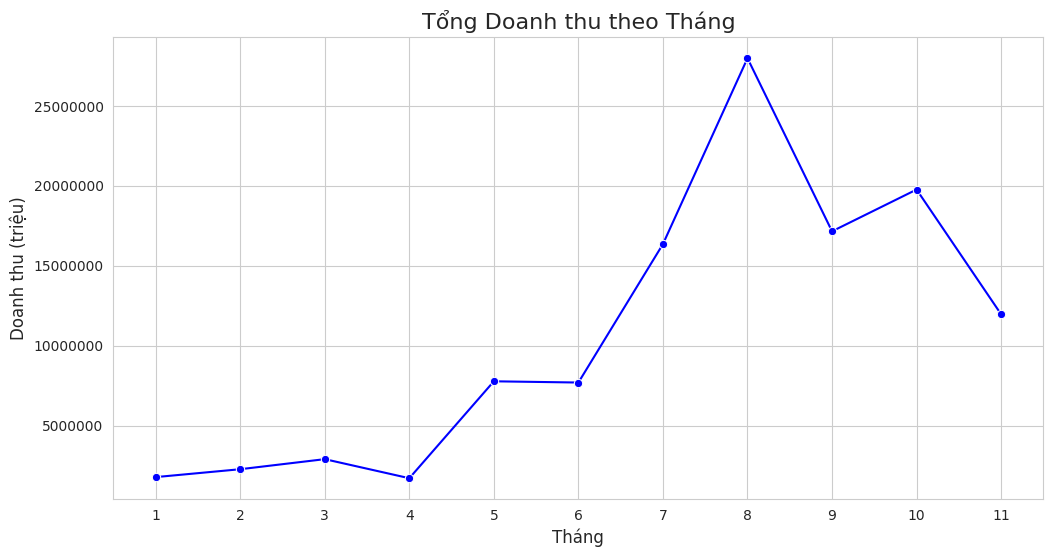

In [ ]:
# Nhóm doanh thu theo tháng và vẽ biểu đồ đường
revenue_by_month = df.groupby('month')['price'].sum()

plt.figure(figsize=(12, 6))
sns.lineplot(x=revenue_by_month.index, y=revenue_by_month.values, marker='o', color='b')
plt.title('Tổng Doanh thu theo Tháng', fontsize=16)
plt.xlabel('Tháng', fontsize=12)
plt.ylabel('Doanh thu (triệu)', fontsize=12)
plt.xticks(revenue_by_month.index)
plt.ticklabel_format(style='plain', axis='y') # Tắt ký hiệu khoa học
plt.show()

<ipython-input-21-3198548366>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=orders_by_hour.index, y=orders_by_hour.values, palette='viridis')


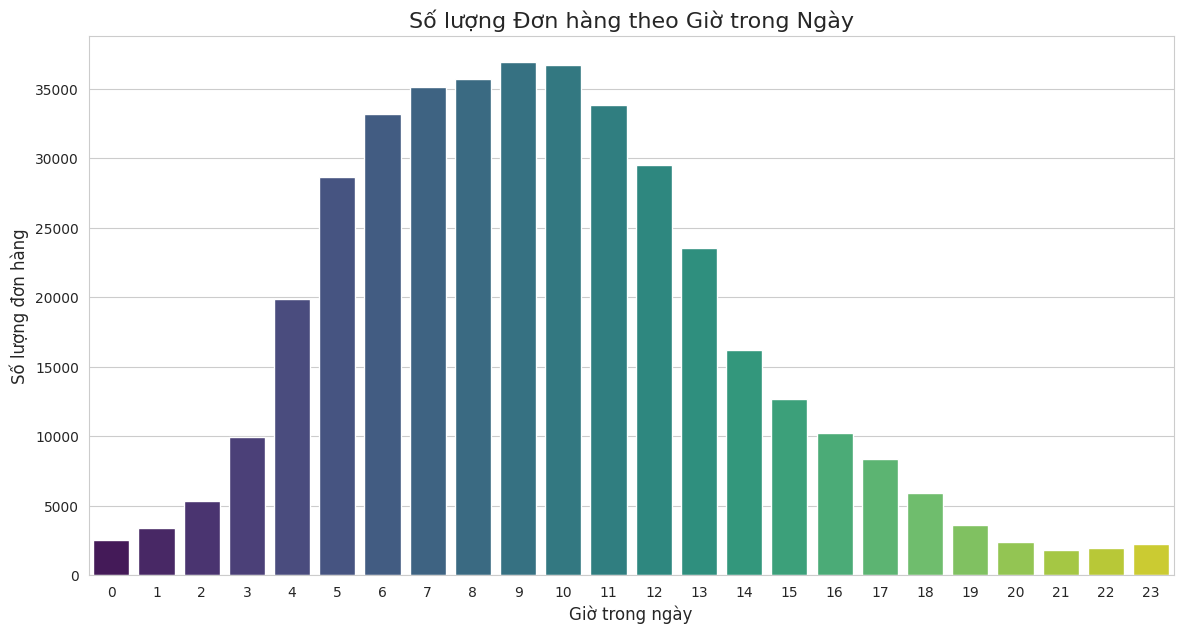

In [ ]:
# Đếm số lượng đơn hàng theo giờ trong ngày
orders_by_hour = df.groupby('hour')['order_id'].nunique()

plt.figure(figsize=(14, 7))
sns.barplot(x=orders_by_hour.index, y=orders_by_hour.values, palette='viridis')
plt.title('Số lượng Đơn hàng theo Giờ trong Ngày', fontsize=16)
plt.xlabel('Giờ trong ngày', fontsize=12)
plt.ylabel('Số lượng đơn hàng', fontsize=12)
plt.show()

<ipython-input-22-3207193952>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_main_category.values, y=revenue_by_main_category.index, orient='h', palette='plasma')


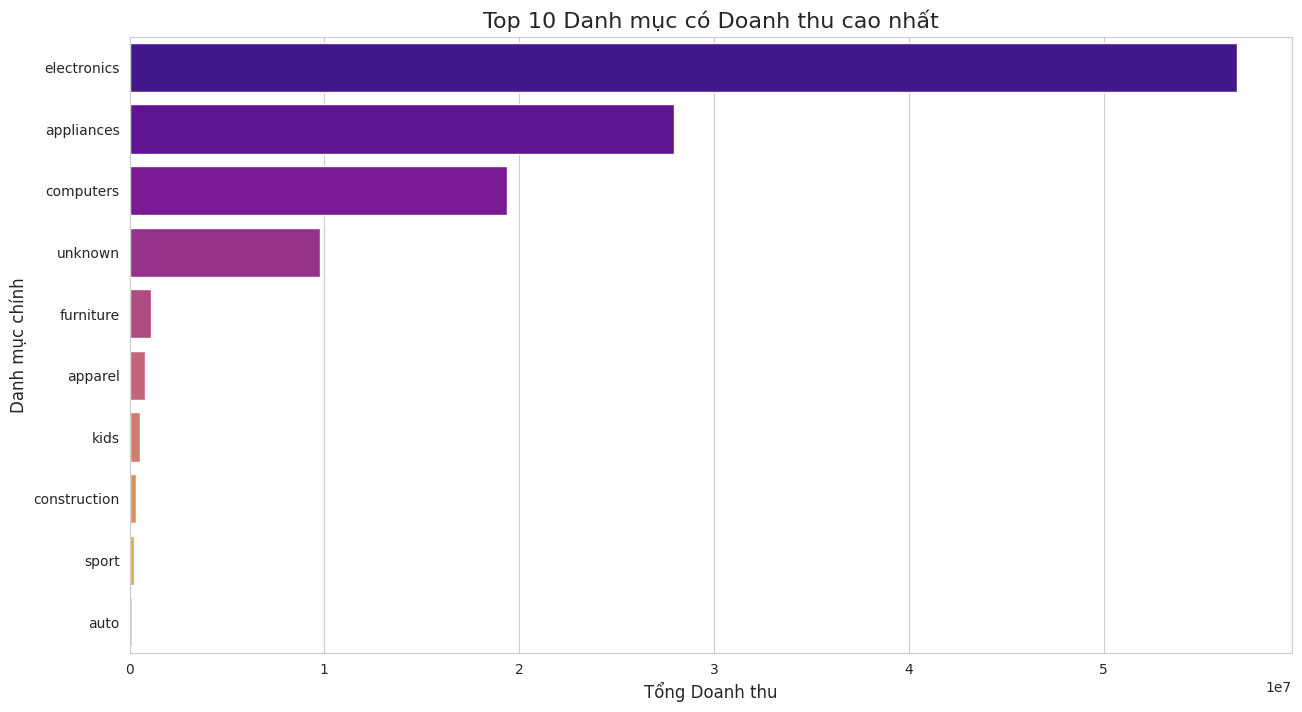

In [ ]:
# Nhóm doanh thu theo danh mục chính
revenue_by_main_category = df.groupby('main_category')['price'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(15, 8))
sns.barplot(x=revenue_by_main_category.values, y=revenue_by_main_category.index, orient='h', palette='plasma')
plt.title('Top 10 Danh mục có Doanh thu cao nhất', fontsize=16)
plt.xlabel('Tổng Doanh thu', fontsize=12)
plt.ylabel('Danh mục chính', fontsize=12)
plt.show()

<ipython-input-30-728335915>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_brand.values, y=revenue_by_brand.index, orient='h', palette='magma')


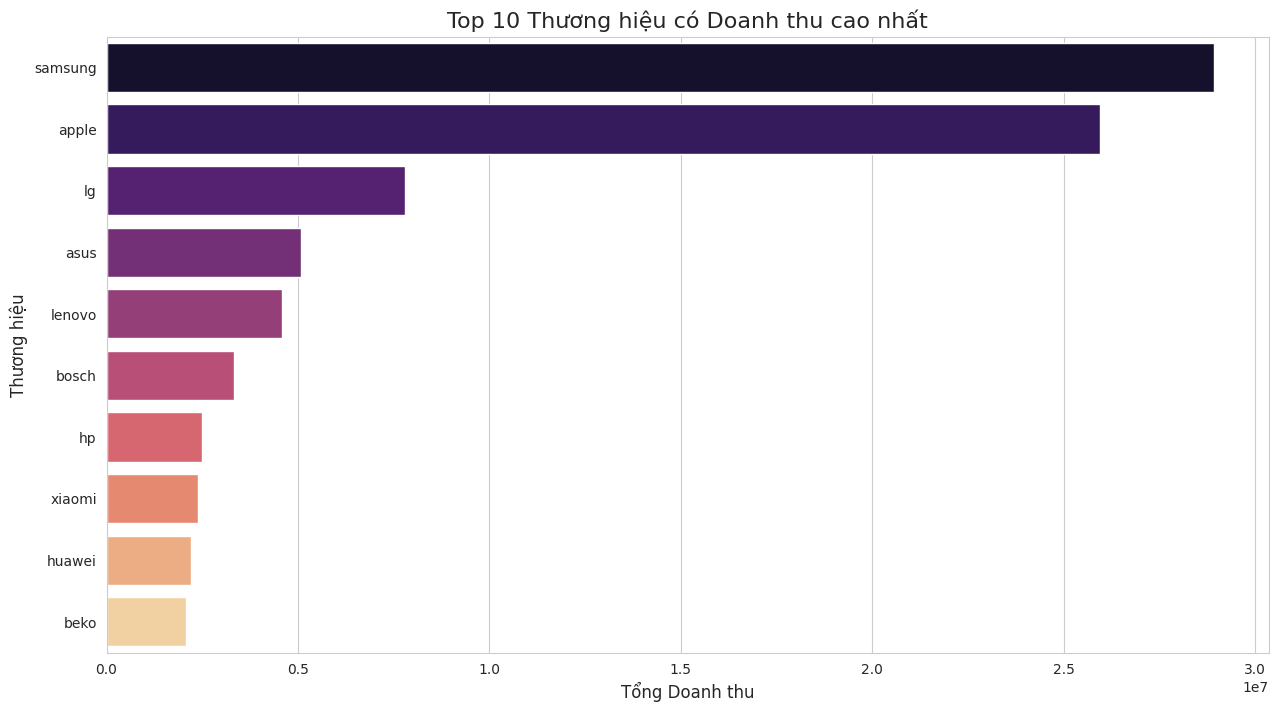

In [ ]:
# Bỏ qua thương hiệu 'unknown' để phân tích chính xác hơn
revenue_by_brand = df[df['brand'] != 'unknown'].groupby('brand')['price'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(15, 8))
sns.barplot(x=revenue_by_brand.values, y=revenue_by_brand.index, orient='h', palette='magma')
plt.title('Top 10 Thương hiệu có Doanh thu cao nhất', fontsize=16)
plt.xlabel('Tổng Doanh thu', fontsize=12)
plt.ylabel('Thương hiệu', fontsize=12)
plt.show()

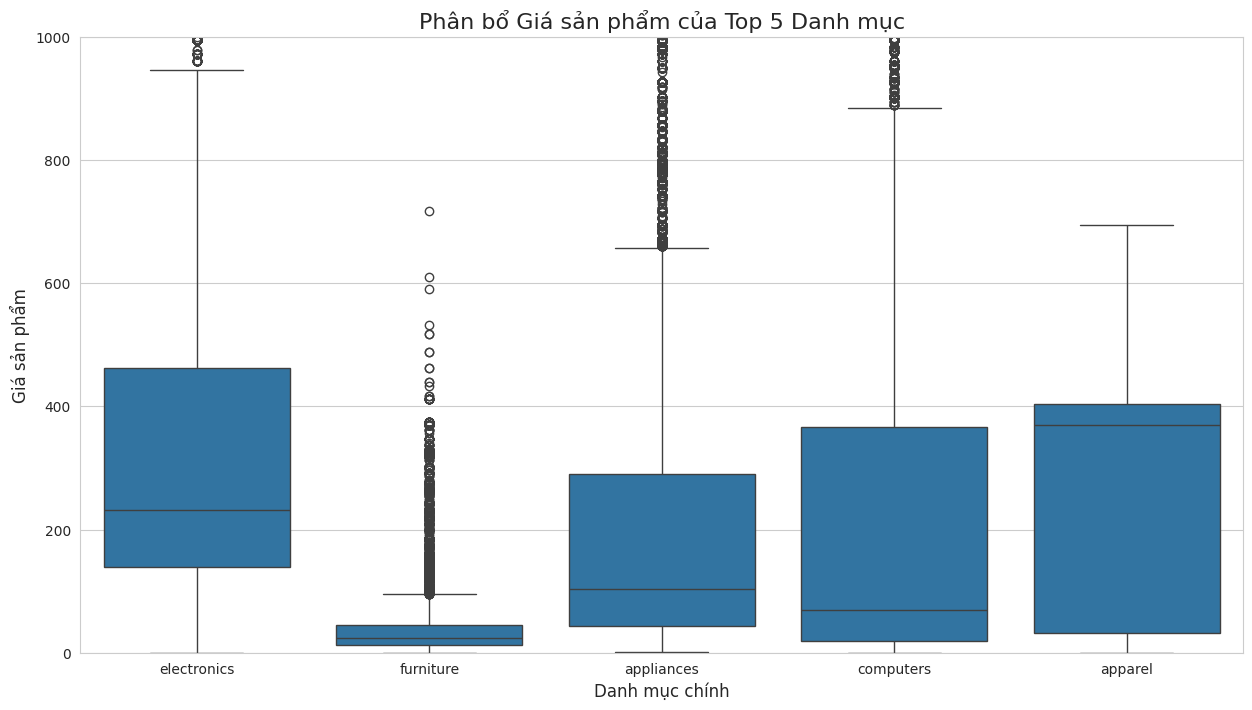

In [ ]:
# Lấy ra top 5 danh mục chính có doanh thu cao nhất (bỏ qua 'unknown')
top_5_categories = df[df['main_category'] != 'unknown'].groupby('main_category')['price'].sum().nlargest(5).index

# Lọc DataFrame chỉ chứa các danh mục này
df_top5_cat = df[df['main_category'].isin(top_5_categories)]

plt.figure(figsize=(15, 8))
sns.boxplot(x='main_category', y='price', data=df_top5_cat)
plt.title('Phân bổ Giá sản phẩm của Top 5 Danh mục', fontsize=16)
plt.xlabel('Danh mục chính', fontsize=12)
plt.ylabel('Giá sản phẩm', fontsize=12)
plt.ylim(0, 1000) # Giới hạn trục y để biểu đồ dễ nhìn hơn, bạn có thể điều chỉnh
plt.show()

<ipython-input-25-4167182202>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands_in_electronics.values, y=top_brands_in_electronics.index, palette='rocket')


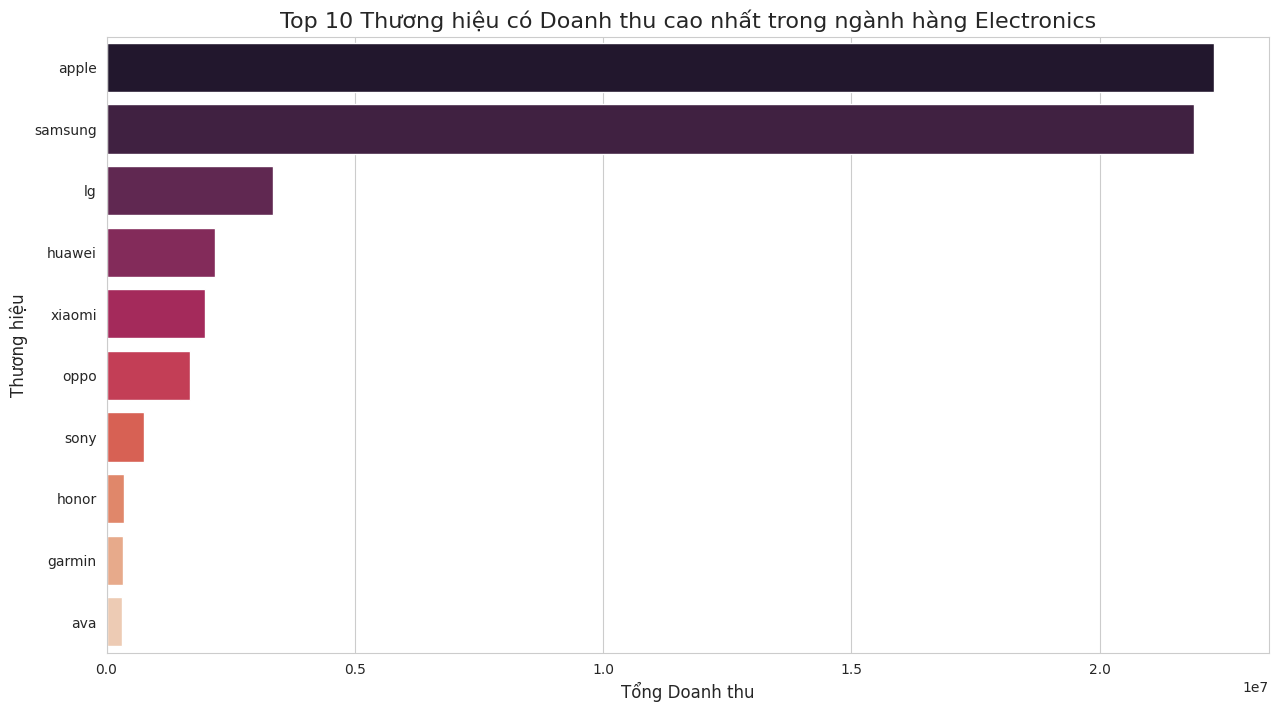

In [ ]:
# Lọc dữ liệu chỉ bao gồm danh mục 'electronics'
df_electronics = df[df['main_category'] == 'electronics']

# Tìm top 10 thương hiệu trong danh mục này
top_brands_in_electronics = df_electronics.groupby('brand')['price'].sum().nlargest(10)

plt.figure(figsize=(15, 8))
sns.barplot(x=top_brands_in_electronics.values, y=top_brands_in_electronics.index, palette='rocket')
plt.title('Top 10 Thương hiệu có Doanh thu cao nhất trong ngành hàng Electronics', fontsize=16)
plt.xlabel('Tổng Doanh thu', fontsize=12)
plt.ylabel('Thương hiệu', fontsize=12)
plt.show()

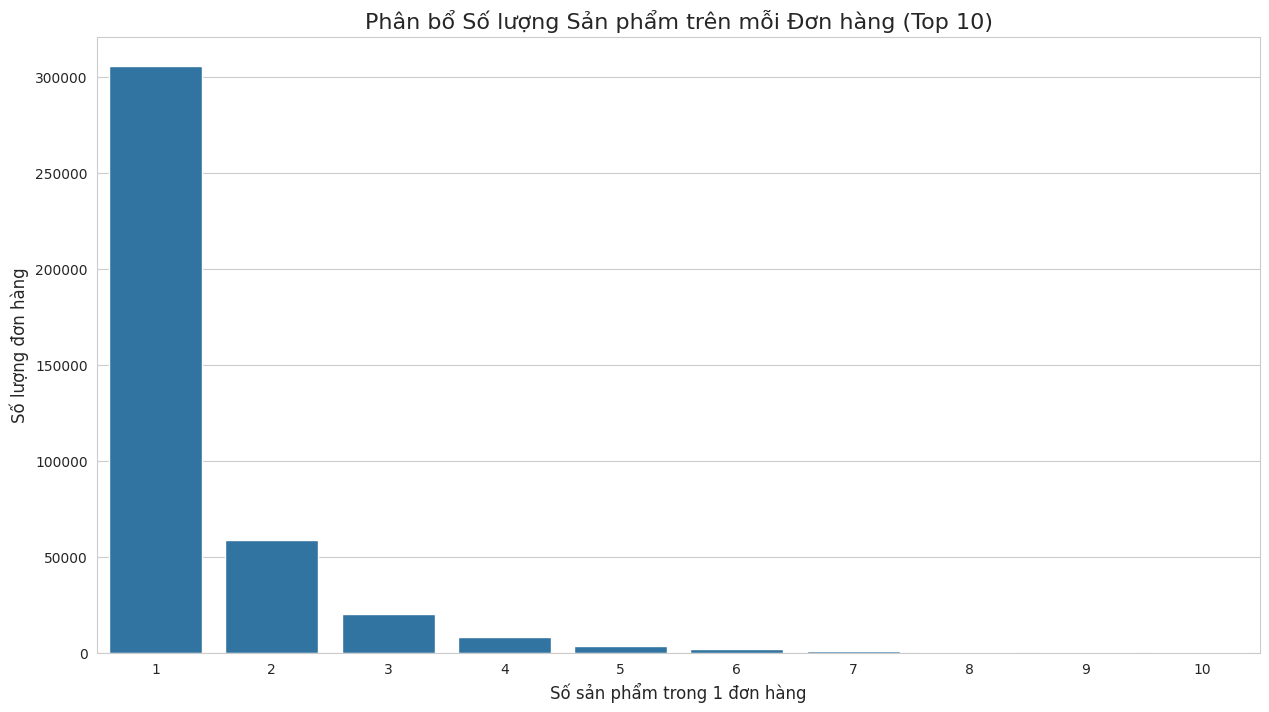

count    399750.000000
mean          1.408035
std           0.994463
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          47.000000
Name: product_id, dtype: float64


In [ ]:
# Tính số lượng sản phẩm trong mỗi đơn hàng
items_per_order = df.groupby('order_id')['product_id'].count()

plt.figure(figsize=(15, 8))
sns.countplot(x=items_per_order, order=items_per_order.value_counts().index[:10])
plt.title('Phân bổ Số lượng Sản phẩm trên mỗi Đơn hàng (Top 10)', fontsize=16)
plt.xlabel('Số sản phẩm trong 1 đơn hàng', fontsize=12)
plt.ylabel('Số lượng đơn hàng', fontsize=12)
plt.show()

print(items_per_order.describe())

<ipython-input-27-1053012967>:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['first_purchase_month'] = df['first_purchase_date'].dt.to_period('M')
<ipython-input-27-1053012967>:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['event_month'] = df['event_time'].dt.to_period('M')


<Figure size 1500x800 with 0 Axes>

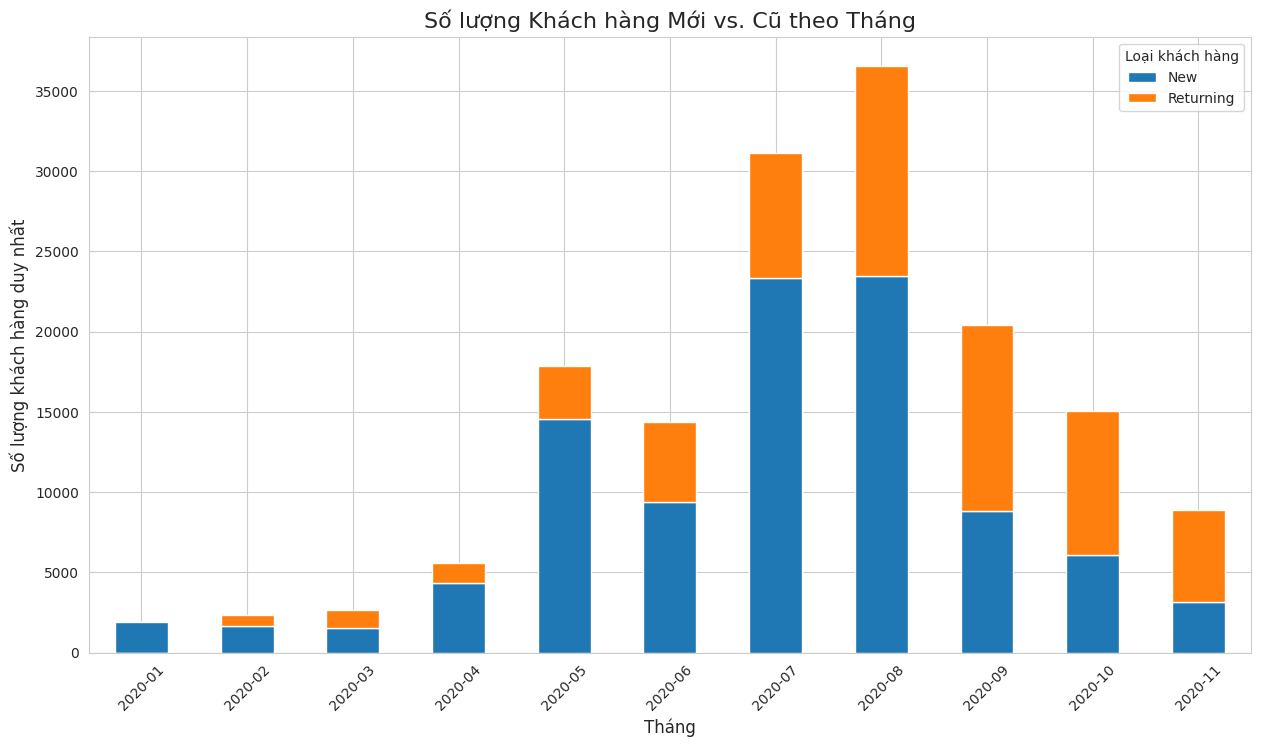

In [ ]:
# Tìm ngày mua hàng đầu tiên của mỗi khách hàng
df['first_purchase_date'] = df.groupby('user_id')['event_time'].transform('min')
# Chỉ lấy tháng và năm
df['first_purchase_month'] = df['first_purchase_date'].dt.to_period('M')
df['event_month'] = df['event_time'].dt.to_period('M')

# Phân loại khách hàng là Mới hay Cũ tại thời điểm mua hàng
df['customer_type'] = 'Returning' # Mặc định là khách cũ
df.loc[df['event_month'] == df['first_purchase_month'], 'customer_type'] = 'New'

# Vẽ biểu đồ
plt.figure(figsize=(15, 8))
df_customer_type = df.groupby(['event_month', 'customer_type'])['user_id'].nunique().unstack()
df_customer_type.plot(kind='bar', stacked=True, figsize=(15, 8))

plt.title('Số lượng Khách hàng Mới vs. Cũ theo Tháng', fontsize=16)
plt.xlabel('Tháng', fontsize=12)
plt.ylabel('Số lượng khách hàng duy nhất', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Loại khách hàng')
plt.show()

In [ ]:
from itertools import combinations
from collections import Counter

# Bước 1: Lọc các đơn hàng có từ 2 sản phẩm trở lên (tối ưu)
order_counts = df.groupby('order_id')['product_id'].transform('count')
orders_with_multiple_items = df[order_counts >= 2]

# Bước 2: Tạo danh sách sản phẩm theo từng đơn hàng
baskets = orders_with_multiple_items.groupby('order_id')['product_id'].apply(list)

# Bước 3: Tạo tất cả các cặp sản phẩm có thể có
product_pairs = []
for basket in baskets:
    sorted_basket = sorted(basket)
    product_pairs.extend(combinations(sorted_basket, 2))

# Bước 4: Đếm tần suất xuất hiện của mỗi cặp
pair_counts = Counter(product_pairs)

# Bước 5: In ra 10 cặp sản phẩm phổ biến nhất
print("--- Top 10 cặp sản phẩm thường được mua cùng nhau ---")
for pair, count in pair_counts.most_common(10):
    print(f"Cặp sản phẩm: {pair} - Số lần mua chung: {count}")


--- Top 10 cặp sản phẩm thường được mua cùng nhau ---
Cặp sản phẩm: ('2273948222722409184', '2273948297037087396') - Số lần mua chung: 385
Cặp sản phẩm: ('1515966223523303307', '1515966223527275752') - Số lần mua chung: 243
Cặp sản phẩm: ('1515966223523303307', '1515966223527325655') - Số lần mua chung: 207
Cặp sản phẩm: ('2273948218662322995', '2273948218662322996') - Số lần mua chung: 196
Cặp sản phẩm: ('1515966223509088532', '1515966223509117074') - Số lần mua chung: 194
Cặp sản phẩm: ('1515966223523303307', '1515966223527250831') - Số lần mua chung: 173
Cặp sản phẩm: ('2273948186349404175', '2273948218662322997') - Số lần mua chung: 136
Cặp sản phẩm: ('1515966223527275752', '1515966223527325655') - Số lần mua chung: 114
Cặp sản phẩm: ('1515966223509089067', '1515966223509106786') - Số lần mua chung: 112
Cặp sản phẩm: ('1515966223509117074', '1515966223517993795') - Số lần mua chung: 103



--- Dữ liệu RFM của khách hàng ---


,Recency,Frequency,MonetaryValue,R_score,F_score,M_score,RFM_Score
user_id,,,,,,,
1.5159156254399521e+18,136,1,416.64,1,1,2,112
1.5159156254400384e+18,25,2,56.43,4,2,1,421
1.5159156254400515e+18,5,5,7530.34,4,4,4,444
1.5159156254400998e+18,13,19,5074.47,4,4,4,444
1.5159156254401216e+18,130,2,182.83,1,2,2,122


<ipython-input-32-3263920647>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_segments.index, y=top_segments.values, palette='coolwarm')


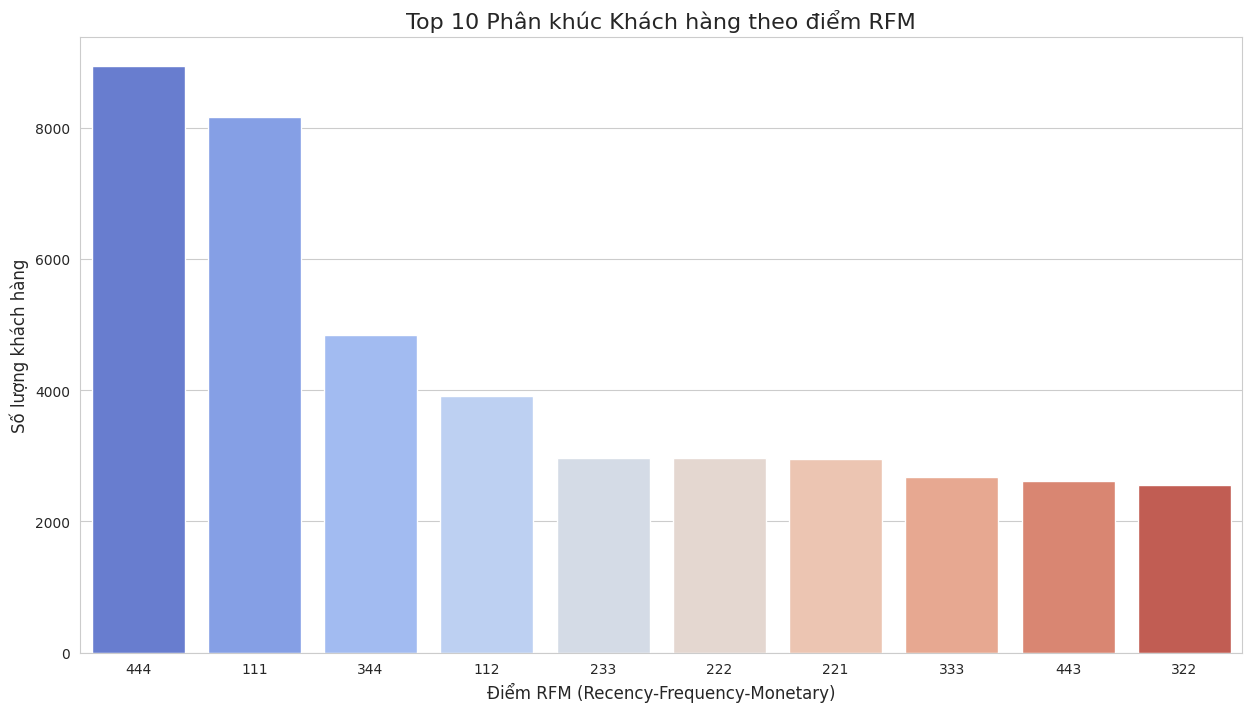

In [ ]:
# --- Tính toán RFM ---

# 1. Xác định ngày cuối cùng trong dữ liệu để tính Recency
snapshot_date = df['event_time'].max() + pd.Timedelta(days=1)

# 2. Tính toán các giá trị R, F, M cho mỗi khách hàng
rfm_df = df.groupby('user_id').agg({
    'event_time': lambda x: (snapshot_date - x.max()).days, # Recency
    'order_id': 'nunique',                                  # Frequency
    'price': 'sum'                                          # Monetary
})

# Đổi tên cột cho dễ hiểu
rfm_df.rename(columns={'event_time': 'Recency',
                       'order_id': 'Frequency',
                       'price': 'MonetaryValue'}, inplace=True)


# 3. Chia điểm cho từng chỉ số (từ 1 đến 4, 4 là tốt nhất)
r_labels = range(4, 0, -1) # Điểm Recency: số ngày càng nhỏ, điểm càng cao
f_labels = range(1, 5)
m_labels = range(1, 5)

rfm_df['R_score'] = pd.qcut(rfm_df['Recency'], q=4, labels=r_labels)
rfm_df['F_score'] = pd.qcut(rfm_df['Frequency'].rank(method='first'), q=4, labels=f_labels)
rfm_df['M_score'] = pd.qcut(rfm_df['MonetaryValue'], q=4, labels=m_labels)

# 4. Tạo điểm RFM cuối cùng
rfm_df['RFM_Score'] = rfm_df['R_score'].astype(str) + rfm_df['F_score'].astype(str) + rfm_df['M_score'].astype(str)

# Hiển thị ví dụ về dữ liệu RFM
print("\n--- Dữ liệu RFM của khách hàng ---")
display(rfm_df.head())

# Trực quan hóa số lượng khách hàng theo điểm RFM
plt.figure(figsize=(15, 8))
top_segments = rfm_df['RFM_Score'].value_counts().head(10)
sns.barplot(x=top_segments.index, y=top_segments.values, palette='coolwarm')
plt.title('Top 10 Phân khúc Khách hàng theo điểm RFM', fontsize=16)
plt.xlabel('Điểm RFM (Recency-Frequency-Monetary)', fontsize=12)
plt.ylabel('Số lượng khách hàng', fontsize=12)
plt.show()

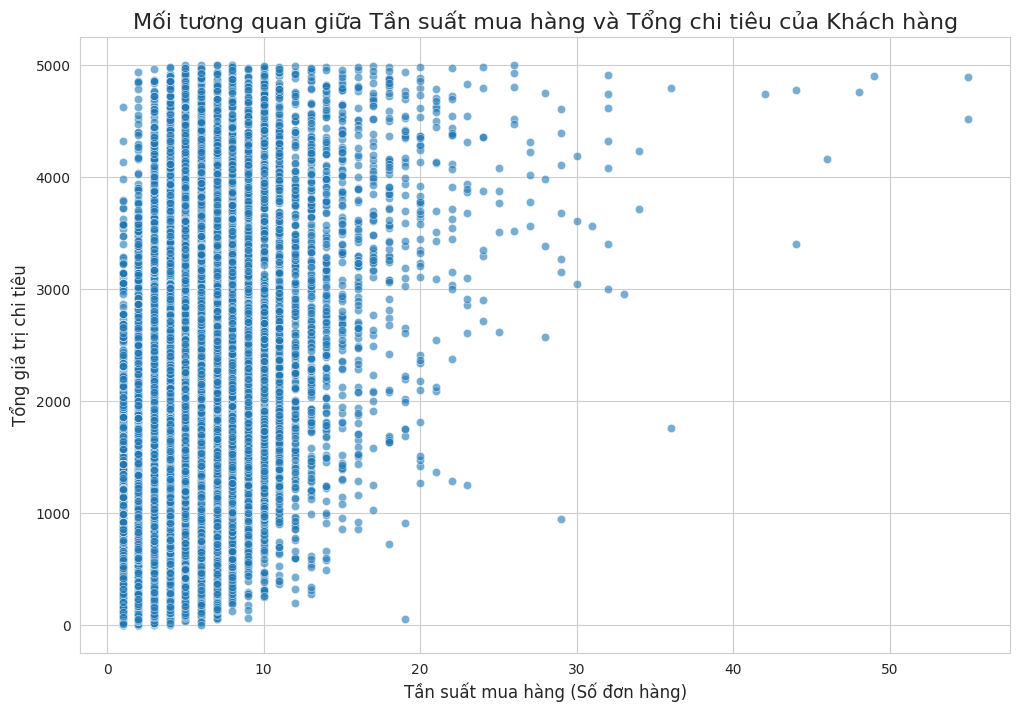

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sử dụng dữ liệu RFM đã tạo ở Bước 5
# Để biểu đồ dễ nhìn hơn, chúng ta có thể lọc bớt các giá trị ngoại lai của Monetary
# Ví dụ: chỉ lấy các khách hàng có tổng chi tiêu dưới một ngưỡng nào đó
rfm_filtered_for_plot = rfm_df[rfm_df['MonetaryValue'] < 5000] # Bạn có thể điều chỉnh ngưỡng 5000

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Frequency', y='MonetaryValue', data=rfm_filtered_for_plot, alpha=0.6)

plt.title('Mối tương quan giữa Tần suất mua hàng và Tổng chi tiêu của Khách hàng', fontsize=16)
plt.xlabel('Tần suất mua hàng (Số đơn hàng)', fontsize=12)
plt.ylabel('Tổng giá trị chi tiêu', fontsize=12)
plt.grid(True)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Chọn các cột RFM để phân cụm
rfm_for_clustering = rfm_df[['Recency', 'Frequency', 'MonetaryValue']]

# Khởi tạo Scaler
scaler = StandardScaler()

# Chuẩn hóa dữ liệu
rfm_scaled = scaler.fit_transform(rfm_for_clustering)

# Chuyển kết quả về lại dạng DataFrame
rfm_scaled_df = pd.DataFrame(rfm_scaled,
                             columns=['Recency', 'Frequency', 'MonetaryValue'],
                             index=rfm_df.index)

print("Dữ liệu đã được chuẩn hóa. 5 dòng đầu tiên:")
display(rfm_scaled_df.head())

Dữ liệu đã được chuẩn hóa. 5 dòng đầu tiên:


,Recency,Frequency,MonetaryValue
user_id,,,
1.5159156254399521e+18,0.667572,-0.186145,-0.203103
1.5159156254400384e+18,-1.364883,-0.125491,-0.297195
1.5159156254400515e+18,-1.731091,0.056472,1.655103
1.5159156254400998e+18,-1.584608,0.905631,1.013593
1.5159156254401216e+18,0.557709,-0.125491,-0.264178


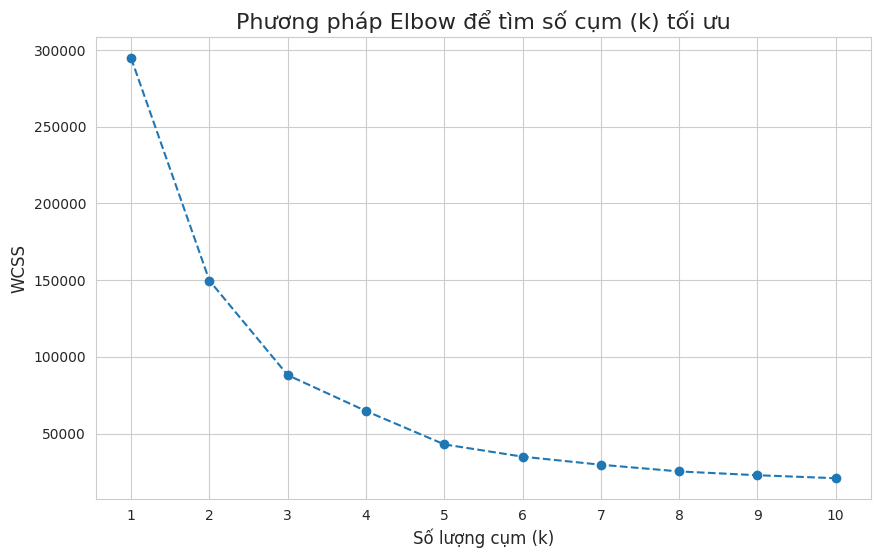

In [ ]:
from sklearn.cluster import KMeans

# Tính toán Within-Cluster Sum of Squares (WCSS) cho các giá trị k khác nhau
wcss = []
k_range = range(1, 11) # Thử với k từ 1 đến 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(rfm_scaled_df)
    wcss.append(kmeans.inertia_) # inertia_ chính là WCSS

# Vẽ biểu đồ Elbow
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('Phương pháp Elbow để tìm số cụm (k) tối ưu', fontsize=16)
plt.xlabel('Số lượng cụm (k)', fontsize=12)
plt.ylabel('WCSS', fontsize=12)
plt.xticks(k_range)
plt.show()

In [ ]:
# Chọn số cụm tối ưu
optimal_k = 4

# Khởi tạo và chạy mô hình K-Means cuối cùng
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
kmeans.fit(rfm_scaled_df)

# Gán nhãn cụm cho từng khách hàng trong DataFrame RFM gốc
rfm_df['Cluster'] = kmeans.labels_

print("Đã gán nhãn cụm cho từng khách hàng. ✅")
display(rfm_df.head())

Đã gán nhãn cụm cho từng khách hàng. ✅


,Recency,Frequency,MonetaryValue,R_score,F_score,M_score,RFM_Score,Cluster
user_id,,,,,,,,
1.5159156254399521e+18,136,1,416.64,1,1,2,112,0
1.5159156254400384e+18,25,2,56.43,4,2,1,421,3
1.5159156254400515e+18,5,5,7530.34,4,4,4,444,3
1.5159156254400998e+18,13,19,5074.47,4,4,4,444,3
1.5159156254401216e+18,130,2,182.83,1,2,2,122,0



--- Đặc điểm trung bình của từng Cụm ---


,Recency,Frequency,MonetaryValue
Cluster,,,
1,5.716730,201.572243,44449.834373
3,36.753500,5.405593,1806.333751
0,106.776019,2.189994,688.597234
2,184.758419,1.421205,361.188143


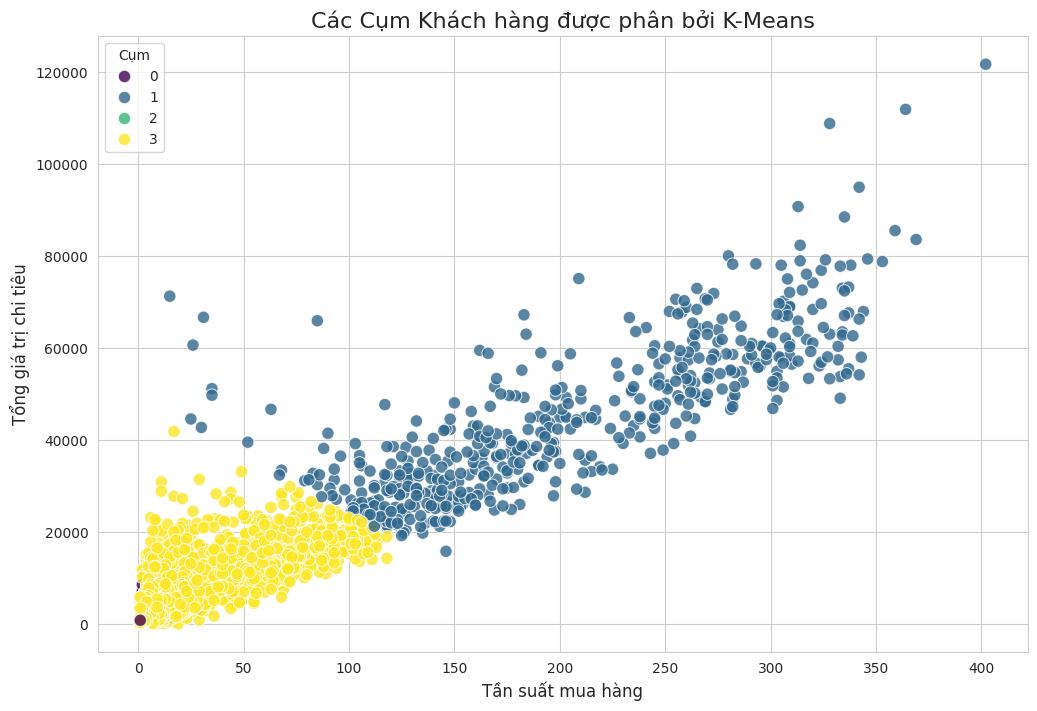

In [ ]:
# Phân tích đặc điểm của từng cụm bằng cách tính giá trị trung bình
cluster_summary = rfm_df.groupby('Cluster')[['Recency', 'Frequency', 'MonetaryValue']].mean().sort_values(by='MonetaryValue', ascending=False)

print("\n--- Đặc điểm trung bình của từng Cụm ---")
display(cluster_summary)

# Trực quan hóa các cụm trên biểu đồ 2D
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Frequency', y='MonetaryValue', hue='Cluster', data=rfm_df, palette='viridis', s=80, alpha=0.8)
plt.title('Các Cụm Khách hàng được phân bởi K-Means', fontsize=16)
plt.xlabel('Tần suất mua hàng', fontsize=12)
plt.ylabel('Tổng giá trị chi tiêu', fontsize=12)
plt.legend(title='Cụm')
plt.show()

In [ ]:
# Xác định số lượng sản phẩm và người dùng để lọc
n_users = 1000
n_products = 500

# Lấy ra danh sách những user hoạt động tích cực nhất
top_users = df['user_id'].value_counts().nlargest(n_users).index

# Lấy ra danh sách những sản phẩm phổ biến nhất
top_products = df['product_id'].value_counts().nlargest(n_products).index

# Lọc DataFrame để chỉ giữ lại các user và sản phẩm này
df_filtered = df[df['user_id'].isin(top_users) & df['product_id'].isin(top_products)]

print(f"Kích thước dữ liệu sau khi lọc: {df_filtered.shape}")

Kích thước dữ liệu sau khi lọc: (73174, 17)


In [ ]:
# Tạo ma trận pivot table, sử dụng 'price' để đếm (chỉ cần biết có tương tác)
# fill_value=0 để điền 0 cho các cặp user-item không có tương tác
user_item_matrix = df_filtered.pivot_table(index='user_id',
                                           columns='product_id',
                                           values='price',
                                           aggfunc='count',
                                           fill_value=0)

# Chuyển các giá trị > 1 thành 1 (chỉ quan tâm mua hay không, không quan tâm số lần)
user_item_matrix[user_item_matrix > 1] = 1


print("Đã tạo xong User-Item Matrix.")
print(f"Kích thước ma trận: {user_item_matrix.shape}")
display(user_item_matrix.head())

Đã tạo xong User-Item Matrix.
Kích thước ma trận: (997, 500)


product_id,1515966223509088493,1515966223509088497,1515966223509088498,1515966223509088506,1515966223509088509,1515966223509088521,1515966223509088522,1515966223509088532,1515966223509088535,1515966223509088536,...,2388434452473906491,2388434452473940468,2388434452474106746,2388434452474181543,2388434452474188614,2388434452475433652,2388434452475528535,2388434452475833969,2388434452476036590,2388434452476036592
user_id,,,,,,,,,,,,,,,,,,,,,
1.5159156254409372e+18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.5159156254409608e+18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.5159156254409884e+18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.5159156254409912e+18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.5159156254410094e+18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Để tính độ tương đồng giữa các sản phẩm (item), ta cần chuyển vị (transpose) ma trận
item_item_matrix = user_item_matrix.T

# Tính toán ma trận tương đồng cosine
# Kết quả là một ma trận vuông, mỗi hàng và cột tương ứng với một sản phẩm
item_similarity = cosine_similarity(item_item_matrix)

# Chuyển kết quả thành một DataFrame cho dễ tra cứu
item_similarity_df = pd.DataFrame(item_similarity,
                                  index=item_item_matrix.index,
                                  columns=item_item_matrix.index)

print("\nĐã tạo xong ma trận tương đồng giữa các sản phẩm.")
display(item_similarity_df.head())


Đã tạo xong ma trận tương đồng giữa các sản phẩm.


product_id,1515966223509088493,1515966223509088497,1515966223509088498,1515966223509088506,1515966223509088509,1515966223509088521,1515966223509088522,1515966223509088532,1515966223509088535,1515966223509088536,...,2388434452473906491,2388434452473940468,2388434452474106746,2388434452474181543,2388434452474188614,2388434452475433652,2388434452475528535,2388434452475833969,2388434452476036590,2388434452476036592
product_id,,,,,,,,,,,,,,,,,,,,,
1515966223509088493,1.000000,0.099449,0.056344,0.055067,0.104328,0.171920,0.066299,0.127593,0.068439,0.127294,...,0.071634,0.039123,0.093205,0.150269,0.033672,0.089087,0.071743,0.093077,0.063387,0.051434
1515966223509088497,0.099449,1.000000,0.065372,0.119262,0.060523,0.146277,0.153846,0.208995,0.142929,0.135032,...,0.079788,0.060523,0.028837,0.079702,0.031254,0.068908,0.066591,0.049368,0.019612,0.023870
1515966223509088498,0.056344,0.065372,1.000000,0.072395,0.123443,0.276876,0.078446,0.266417,0.080978,0.043033,...,0.124312,0.113156,0.122536,0.160867,0.079682,0.163970,0.169775,0.136352,0.083333,0.040572
1515966223509088506,0.055067,0.119262,0.072395,1.000000,0.053620,0.169356,0.102225,0.146584,0.052762,0.056077,...,0.044180,0.160860,0.111775,0.176529,0.086529,0.091574,0.168561,0.136679,0.065156,0.026435
1515966223509088509,0.104328,0.060523,0.123443,0.053620,1.000000,0.334808,0.084732,0.301466,0.137446,0.132803,...,0.156941,0.180952,0.215548,0.266513,0.196723,0.216867,0.336817,0.184501,0.092582,0.056344


In [ ]:
def get_recommendations(product_id, num_recs=5):
    """
    Hàm gợi ý sản phẩm dựa trên ma trận tương đồng item-item.
    Args:
        product_id (str): ID của sản phẩm cần tìm gợi ý.
        num_recs (int): Số lượng sản phẩm gợi ý muốn trả về.
    Returns:
        list: Danh sách các sản phẩm được gợi ý.
    """
    if product_id not in item_similarity_df.columns:
        return f"Sản phẩm {product_id} không có trong bộ dữ liệu đã lọc."

    # Lấy ra các sản phẩm tương đồng và sắp xếp chúng
    similar_products = item_similarity_df[product_id].sort_values(ascending=False)

    # Loại bỏ chính sản phẩm đó ra khỏi danh sách gợi ý (vì độ tương đồng là 1.0)
    similar_products = similar_products.drop(product_id)

    # Trả về top N sản phẩm
    return similar_products.head(num_recs)

In [ ]:
# Chọn một sản phẩm bất kỳ để thử nghiệm
# Bạn có thể thay bằng bất kỳ ID sản phẩm nào có trong item_similarity_df.columns
test_product_id = '1515966223509088498' # Ví dụ, bạn có thể thay ID này

# Lấy ra danh sách gợi ý
recommendations = get_recommendations(test_product_id, num_recs=5)

print(f"--- Gợi ý cho sản phẩm có ID: {test_product_id} ---")
if isinstance(recommendations, str):
    print(recommendations)
else:
    print(recommendations)

--- Gợi ý cho sản phẩm có ID: 1515966223509088498 ---
product_id
1515966223517846928    0.325929
2273948227654910595    0.280430
1515966223509088521    0.276876
1515966223522710797    0.275000
1515966223509117074    0.268622
Name: 1515966223509088498, dtype: float64
